<a href="https://colab.research.google.com/github/Hima-232bindhu/crt-0104/blob/main/genai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install openai


To use the OpenAI API, you'll need an API key. If you don't already have one, you can create one on the [OpenAI website](https://beta.openai.com/account/api-keys).

In Colab, you can add your API key to the secrets manager under the "🔑" icon in the left panel. Name the secret `OPENAI_API_KEY`.

Then, you can access it in your notebook like this:

In [ ]:
import openai
from google.colab import userdata

# Retrieve the API key from Colab's secrets manager
openai.api_key = userdata.get('OPENAI_API_KEY')

if openai.api_key:
    print("OpenAI API key loaded successfully.")
else:
    print("OpenAI API key not found. Please add it to Colab's secrets manager.")

OpenAI API key loaded successfully.


In [ ]:
pip install pillow


In [ ]:
from PIL import Image, ImageDraw, ImageFont
import PIL # Import PIL explicitly

def generate_simple_logo(text="MyLogo", bg_color="#1E90FF", text_color="white", image_path=None, font_path="arial.ttf", font_size=60, style="simple", background_image_path=None, text_effect=None):
    width, height = 400, 200

    if background_image_path:
        try:
            background_image = PIL.Image.open(background_image_path).convert("RGB")
            # Resize background image to fit the logo dimensions
            image = background_image.resize((width, height))
        except FileNotFoundError:
            print(f"Error: Background image file not found at {background_image_path}. Using solid background color.")
            image = PIL.Image.new("RGB", (width, height), bg_color) # Use PIL.Image.new
        except Exception as e:
            print(f"Error processing background image: {e}. Using solid background color.")
            image = PIL.Image.new("RGB", (width, height), bg_color) # Use PIL.Image.new
    else:
        image = PIL.Image.new("RGB", (width, height), bg_color) # Use PIL.Image.new


    draw = ImageDraw.Draw(image)

    try:
        font = ImageFont.truetype(font_path, size=font_size)
    except IOError:
        print(f"Warning: Font file not found at {font_path}. Using default font.")
        font = ImageFont.load_default()

    # Use textbbox instead of textsize
    bbox = draw.textbbox((0, 0), text, font=font)
    text_width = bbox[2] - bbox[0]
    text_height = bbox[3] - bbox[1]

    text_position = ((width - text_width) // 2, (height - text_height) // 2)

    # Apply text effect (basic example: outline)
    if text_effect == "outline":
        outline_color = "black"  # You can make this a parameter
        outline_width = 2       # You can make this a parameter
        # Draw outline
        for x_offset in range(-outline_width, outline_width + 1):
            for y_offset in range(-outline_width, outline_width + 1):
                if x_offset != 0 or y_offset != 0:
                    draw.text((text_position[0] + x_offset, text_position[1] + y_offset), text, font=font, fill=outline_color)


    # Apply style (basic example)
    if style == "bold":
        # This is a simplified approach; true bolding depends on font support
        draw.text((text_position[0] + 1, text_position[1]), text, font=font, fill=text_color)


    draw.text(text_position, text, font=font, fill=text_color)

    if image_path:
        try:
            overlay_image = PIL.Image.open(image_path).convert("RGBA") # Use PIL.Image.open
            # Resize the image if needed (optional)
            overlay_image = overlay_image.resize((100, 100)) # Example resize
            # Paste the image onto the logo (adjust position as needed)
            image.paste(overlay_image, (50, 50), overlay_image)
        except FileNotFoundError:
            print(f"Error: Image file not found at {image_path}")
        except Exception as e:
            print(f"Error processing image: {e}")


    image.save("generated_logo.png")
    print("Logo saved as 'generated_logo.png'")

# Example with image (replace 'your_image.png' with your image file)
# generate_simple_logo("HB Tech", "#222222", "cyan", image_path='your_image.png')

# Example without image
# generate_simple_logo("HB Tech", "#222222", "cyan")

Let's get some input from you to customize the logo. We'll ask for the text, background color, and text color.

In [ ]:
import os

def get_logo_input():
    logo_text = input("Enter the text for your logo: ")
    bg_color = input("Enter the background color (e.g., #1E90FF or blue): ")
    text_color = input("Enter the text color (e.g., white or #FFFFFF): ")
    image_path = input("Enter the path to an overlay image file (optional, leave blank to skip): ")
    background_image_path = input("Enter the path to a background image file (optional, leave blank for solid color): ")

    # Basic Font Picker
    print("\nAvailable Fonts (or enter a path to your font file):")
    # List some common system fonts or fonts in the current directory
    available_fonts = ["arial.ttf", "Times New Roman.ttf", "Verdana.ttf", "Courier New.ttf", "Georgia.ttf", "Trebuchet MS.ttf"] # Added more common fonts
    for i, font_name in enumerate(available_fonts):
        print(f"{i+1}. {font_name}")

    font_choice = input(f"Enter the number of your choice or a path to your font file (leave blank for default - arial.ttf): ")

    if font_choice.isdigit() and int(font_choice) > 0 and int(font_choice) <= len(available_fonts):
        font_path = available_fonts[int(font_choice) - 1]
    elif font_choice:
        font_path = font_choice # User provided a path
    else:
        font_path = "arial.ttf" # Default font


    font_size_input = input("Enter the font size (e.g., 60, leave blank for default): ")
    if not font_size_input:
        font_size = 100 # Default size
    else:
        font_size = int(font_size_input) # Convert to integer

    style = input("Enter a style (e.g., simple, bold - basic support, leave blank for simple): ")
    if not style:
        style = "simple" # Default style

    text_effect = input("Enter a text effect (e.g., outline, shadow, leave blank for none): ")

    # Basic Shape Input (for rectangles)
    shapes = []
    add_shape = input("Add a rectangle shape? (yes/no, leave blank for no): ").lower()
    if add_shape == "yes":
        try:
            shape_color = input("Enter rectangle color (e.g., red or #FF0000): ")
            shape_x = int(input("Enter top-left x coordinate for rectangle: "))
            shape_y = int(input("Enter top-left y coordinate for rectangle: "))
            shape_width = int(input("Enter rectangle width: "))
            shape_height = int(input("Enter rectangle height: "))
            shapes.append({"type": "rectangle", "color": shape_color, "position": (shape_x, shape_y), "size": (shape_width, shape_height)})
        except ValueError:
            print("Invalid input for shape parameters. Skipping shape.")


    return logo_text, bg_color, text_color, image_path, font_path, font_size, style, background_image_path, text_effect, shapes

logo_text, bg_color, text_color, image_path, font_path, font_size, style, background_image_path, text_effect, shapes = get_logo_input()
print(f"\nUsing Text: {logo_text}, Background Color: {bg_color}, Text Color: {text_color}")
if image_path:
    print(f"Using Overlay Image: {image_path}")
else:
    print("No overlay image will be used.")
if background_image_path:
    print(f"Using Background Image: {background_image_path}")
else:
    print("Using solid background color.")

print(f"Using Font: {font_path}, Size: {font_size}, Style: {style}")
if text_effect:
    print(f"Using Text Effect: {text_effect}")
else:
    print("No text effect will be used.")
if shapes:
    print(f"Adding Shapes: {shapes}")
else:
    print("No shapes will be added.")

Enter the text for your logo: hii
Enter the background color (e.g., #1E90FF or blue): peach
Enter the text color (e.g., white or #FFFFFF): black
Enter the path to an overlay image file (optional, leave blank to skip): 
Enter the path to a background image file (optional, leave blank for solid color): 

Available Fonts (or enter a path to your font file):
1. arial.ttf
2. Times New Roman.ttf
3. Verdana.ttf
4. Courier New.ttf
5. Georgia.ttf
6. Trebuchet MS.ttf
Enter the number of your choice or a path to your font file (leave blank for default - arial.ttf): 6
Enter the font size (e.g., 60, leave blank for default): 60
Enter a style (e.g., simple, bold - basic support, leave blank for simple): simple
Enter a text effect (e.g., outline, shadow, leave blank for none): outline
Add a rectangle shape? (yes/no, leave blank for no): no

Using Text: hii, Background Color: peach, Text Color: black
No overlay image will be used.
Using solid background color.
Using Font: Trebuchet MS.ttf, Size: 60, S

In [ ]:
# Use the user input to generate the logo
generate_simple_logo(logo_text, bg_color, text_color, image_path=image_path, font_path=font_path, font_size=font_size, style=style, background_image_path=background_image_path, text_effect=text_effect)

Logo saved as 'generated_logo.png'


Now, let's display the generated logo.

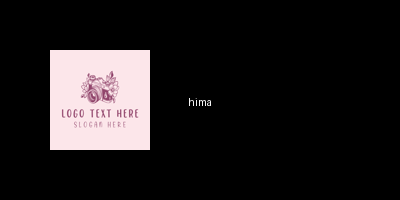

In [ ]:
from IPython.display import Image, display

try:
    display(Image(filename='generated_logo.png'))
except FileNotFoundError:
    print("Error: 'generated_logo.png' not found. Please ensure the logo was generated successfully.")

# Task
Generate a logo with a brand name overlay using a GenAI model for the base image and PIL for text manipulation, incorporating various font styles, text effects, and logo styles.

## Generate a base image using a genai model

### Subtask:
Use a text prompt to generate a relevant image that will serve as the background for the logo.


**Reasoning**:
Define a prompt for image generation and use the OpenAI API to generate and save the image.



In [ ]:
prompt = "A minimalist abstract background image in shades of blue and gray, suitable for a tech company logo."
try:
    response = openai.images.generate(
        model="dall-e-3",
        prompt=prompt,
        size="1024x1024",
        quality="standard",
        n=1,
    )
    image_url = response.data[0].url
    print(f"Generated image URL: {image_url}")

    # Download the image
    import requests
    image_data = requests.get(image_url).content
    with open("generated_background.png", "wb") as f:
        f.write(image_data)
    print("Generated image saved as 'generated_background.png'")

except Exception as e:
    print(f"Error generating image: {e}")

Error generating image: Error code: 400 - {'error': {'message': 'Billing hard limit has been reached', 'type': 'image_generation_user_error', 'param': None, 'code': 'billing_hard_limit_reached'}}


## Overlay the brand name text

### Subtask:
Overlay the brand name text on top of the generated image.


**Reasoning**:
Load the background image and overlay the text.



In [ ]:
import PIL.Image
import PIL.ImageDraw
import PIL.ImageFont

# 1. Load the generated background image
background_image_path = 'generated_background.png'
try:
    background_image = PIL.Image.open(background_image_path).convert("RGB")
    print(f"Loaded background image from {background_image_path}")
except FileNotFoundError:
    print(f"Warning: Generated background image not found at {background_image_path}. Loading a placeholder.")
    # Load a placeholder or default image if the generated one is missing
    width, height = 1024, 1024
    background_image = PIL.Image.new("RGB", (width, height), "#DDDDDD")
    # Draw some placeholder text
    draw = PIL.ImageDraw.Draw(background_image)
    try:
        font = PIL.ImageFont.truetype("arial.ttf", size=50)
    except IOError:
        font = PIL.ImageFont.load_default()
    text = "Placeholder Background"
    bbox = draw.textbbox((0, 0), text, font=font)
    text_width = bbox[2] - bbox[0]
    text_height = bbox[3] - bbox[1]
    text_position = ((width - text_width) // 2, (height - text_height) // 2)
    draw.text(text_position, text, font=font, fill="black")


# 2. Prepare the brand name text
# 'logo_text' is already available from a previous step
# 'text_color' and 'font_path', 'font_size', 'style', 'text_effect' are also available

# 3. Use the ImageDraw module
draw = PIL.ImageDraw.Draw(background_image)

# 4. Define the position
width, height = background_image.size

try:
    font = PIL.ImageFont.truetype(font_path, size=font_size)
except IOError:
    print(f"Warning: Font file not found at {font_path}. Using default font for text overlay.")
    font = PIL.ImageFont.load_default()
    # Adjust font size if using default font, as it's not scalable in the same way
    font_size = 16 # Default font has fixed size, this is just for the print statement
    print(f"Using default font with size {font_size}")


# Use textbbox instead of textsize
bbox = draw.textbbox((0, 0), logo_text, font=font)
text_width = bbox[2] - bbox[0]
text_height = bbox[3] - bbox[1]

# Center the text
text_position = ((width - text_width) // 2, (height - text_height) // 2)

# Apply text effect (basic example: outline)
if text_effect == "outline":
    outline_color = "black"  # You can make this a parameter
    outline_width = 2       # You can make this a parameter
    # Draw outline
    for x_offset in range(-outline_width, outline_width + 1):
        for y_offset in range(-outline_width, outline_width + 1):
            if x_offset != 0 or y_offset != 0:
                draw.text((text_position[0] + x_offset, text_position[1] + y_offset), logo_text, font=font, fill=outline_color)

# Apply style (basic example)
if style == "bold":
    # This is a simplified approach; true bolding depends on font support
    draw.text((text_position[0] + 1, text_position[1]), logo_text, font=font, fill=text_color)


# 5. Draw the text onto the image
draw.text(text_position, logo_text, font=font, fill=text_color)

# Save the image with the overlaid text
background_image.save("logo_with_text.png")
print("Logo with overlaid text saved as 'logo_with_text.png'")

Using default font with size 16
Logo with overlaid text saved as 'logo_with_text.png'


## Implement logo styles for the text

### Subtask:
Apply different visual styles to the overlaid text (e.g., font, size, color, effects like outline or shadow).


**Reasoning**:
Modify the existing `generate_simple_logo` function to incorporate the requested text styling and effects based on the available variables.



In [ ]:
from PIL import Image, ImageDraw, ImageFont
import PIL # Import PIL explicitly

def generate_simple_logo(text="MyLogo", bg_color="#1E90FF", text_color="white", image_path=None, font_path="arial.ttf", font_size=60, style="simple", background_image_path=None, text_effect=None):
    width, height = 400, 200

    if background_image_path:
        try:
            background_image = PIL.Image.open(background_image_path).convert("RGB")
            # Resize background image to fit the logo dimensions
            image = background_image.resize((width, height))
        except FileNotFoundError:
            print(f"Error: Background image file not found at {background_image_path}. Using solid background color.")
            image = PIL.Image.new("RGB", (width, height), bg_color) # Use PIL.Image.new
        except Exception as e:
            print(f"Error processing background image: {e}. Using solid background color.")
            image = PIL.Image.new("RGB", (width, height), bg_color) # Use PIL.Image.new
    else:
        image = PIL.Image.new("RGB", (width, height), bg_color) # Use PIL.Image.new


    draw = ImageDraw.Draw(image)

    try:
        font = ImageFont.truetype(font_path, size=font_size)
    except IOError:
        print(f"Warning: Font file not found at {font_path}. Using default font.")
        font = ImageFont.load_default()

    # Use textbbox instead of textsize
    bbox = draw.textbbox((0, 0), text, font=font)
    text_width = bbox[2] - bbox[0]
    text_height = bbox[3] - bbox[1]

    text_position = ((width - text_width) // 2, (height - text_height) // 2)

    # Apply text effect
    if text_effect == "outline":
        outline_color = "black"
        outline_width = 2
        for x_offset in range(-outline_width, outline_width + 1):
            for y_offset in range(-outline_width, outline_width + 1):
                if x_offset != 0 or y_offset != 0:
                    draw.text((text_position[0] + x_offset, text_position[1] + y_offset), text, font=font, fill=outline_color)
    elif text_effect == "shadow":
        shadow_color = "black" # You can make this a parameter
        shadow_offset = (5, 5)  # You can make this a parameter
        draw.text((text_position[0] + shadow_offset[0], text_position[1] + shadow_offset[1]), text, font=font, fill=shadow_color)


    # Apply style (basic example)
    if style == "bold":
        # This is a simplified approach; true bolding depends on font support
        draw.text((text_position[0] + 1, text_position[1]), text, font=font, fill=text_color)


    draw.text(text_position, text, font=font, fill=text_color)

    if image_path:
        try:
            overlay_image = PIL.Image.open(image_path).convert("RGBA") # Use PIL.Image.open
            # Resize the image if needed (optional)
            overlay_image = overlay_image.resize((100, 100)) # Example resize
            # Paste the image onto the logo (adjust position as needed)
            image.paste(overlay_image, (50, 50), overlay_image)
        except FileNotFoundError:
            print(f"Error: Image file not found at {image_path}")
        except Exception as e:
            print(f"Error processing image: {e}")


    image.save("generated_logo.png")
    print("Logo saved as 'generated_logo.png'")

# The variables logo_text, bg_color, text_color, image_path, font_path, font_size, style, background_image_path, text_effect
# are assumed to be available from the previous user input step.
# The next cell will call this function with those variables.

**Reasoning**:
Call the updated `generate_simple_logo` function with the user input variables to generate the logo with the specified styling and effects.



In [ ]:
# Use the user input to generate the logo with the updated styling and effects
generate_simple_logo(text=logo_text, bg_color=bg_color, text_color=text_color, image_path=image_path, font_path=font_path, font_size=font_size, style=style, background_image_path=background_image_path, text_effect=text_effect, shapes=shapes)

ValueError: unknown color specifier: 'peach'

**Reasoning**:
Display the generated logo image to visually confirm the applied text styles and effects.



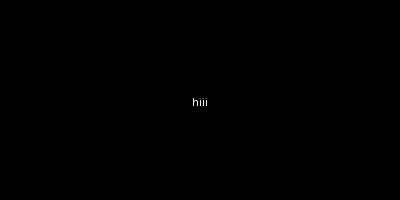

In [ ]:
from IPython.display import Image, display

try:
    display(Image(filename='generated_logo.png'))
except FileNotFoundError:
    print("Error: 'generated_logo.png' not found. Please ensure the logo was generated successfully.")

In [4]:
from PIL import Image, ImageDraw, ImageFont, ImageColor
import PIL # Import PIL explicitly

def generate_simple_logo(text="MyLogo", bg_color="#1E90FF", text_color="white", image_path=None, font_path="arial.ttf", font_size=60, style="simple", background_image_path=None, text_effect=None, text_position=None, shapes=None):
    width, height = 400, 200

    # Function to safely get color
    def safe_get_color(color_specifier):
        try:
            # Try to parse as a color name (like "red") or hex code (#FF0000)
            return ImageColor.getrgb(color_specifier)
        except ValueError:
            print(f"Warning: Unknown color specifier '{color_specifier}'. Using black.")
            return (0, 0, 0) # Default to black if color is invalid

    # Get colors safely
    bg_color_rgb = safe_get_color(bg_color)
    text_color_rgb = safe_get_color(text_color)


    if background_image_path:
        try:
            background_image = PIL.Image.open(background_image_path).convert("RGB")
            # Resize background image to fit the logo dimensions
            image = background_image.resize((width, height))
        except FileNotFoundError:
            print(f"Error: Background image file not found at {background_image_path}. Using solid background color.")
            image = PIL.Image.new("RGB", (width, height), bg_color_rgb) # Use PIL.Image.new
        except Exception as e:
            print(f"Error processing background image: {e}. Using solid background color.")
            image = PIL.Image.new("RGB", (width, height), bg_color_rgb) # Use PIL.Image.new
    else:
        image = PIL.Image.new("RGB", (width, height), bg_color_rgb) # Use PIL.Image.new


    draw = ImageDraw.Draw(image)

    # Draw shapes if provided
    if shapes:
        for shape in shapes:
            shape_type = shape.get("type")
            color = shape.get("color", "black")
            position = shape.get("position")
            size = shape.get("size") # For rectangles/ellipses

            shape_color_rgb = safe_get_color(color)

            if shape_type == "rectangle" and position and size:
                draw.rectangle([position, (position[0] + size[0], position[1] + size[1])], fill=shape_color_rgb)
            # Add more shape types here (e.g., "ellipse", "line")


    try:
        font = ImageFont.truetype(font_path, size=font_size)
    except IOError:
        print(f"Warning: Font file not found at {font_path}. Using default font.")
        font = ImageFont.load_default()

    # Calculate text size
    bbox = draw.textbbox((0, 0), text, font=font)
    text_width = bbox[2] - bbox[0]
    text_height = bbox[3] - bbox[1]

    # Determine text position
    if text_position is None:
        # Center the text if no position is provided
        text_position = ((width - text_width) // 2, (height - text_height) // 2)

    # Apply text effect
    if text_effect == "outline":
        outline_color = "black"
        outline_width = 2
        outline_color_rgb = safe_get_color(outline_color)
        for x_offset in range(-outline_width, outline_width + 1):
            for y_offset in range(-outline_width, outline_width + 1):
                if x_offset != 0 or y_offset != 0:
                    draw.text((text_position[0] + x_offset, text_position[1] + y_offset), text, font=font, fill=outline_color_rgb)
    elif text_effect == "shadow":
        shadow_color = "black"
        shadow_offset = (5, 5)
        shadow_color_rgb = safe_get_color(shadow_color)
        draw.text((text_position[0] + shadow_offset[0], text_position[1] + shadow_offset[1]), text, font=font, fill=shadow_color_rgb)


    # Apply style (basic example)
    if style == "bold":
        draw.text((text_position[0] + 1, text_position[1]), text, font=font, fill=text_color_rgb)


    draw.text(text_position, text, font=font, fill=text_color_rgb)

    if image_path:
        try:
            overlay_image = PIL.Image.open(image_path).convert("RGBA")
            # Resize the image if needed (optional)
            overlay_image = overlay_image.resize((100, 100))
            # Paste the image onto the logo (adjust position as needed)
            image.paste(overlay_image, (50, 50), overlay_image)
        except FileNotFoundError:
            print(f"Error: Image file not found at {image_path}")
        except Exception as e:
            print(f"Error processing image: {e}")


    image.save("generated_logo.png")
    print("Logo saved as 'generated_logo.png'")

# The variables logo_text, bg_color, text_color, image_path, font_path, font_size, style, background_image_path, text_effect
# are assumed to be available from the previous user input step.
# The next cell will call this function with those variables.

In [ ]:
import os

def get_logo_input():
    logo_text = input("Enter the text for your logo: ")
    bg_color = input("Enter the background color (e.g., #1E90FF or blue): ")
    text_color = input("Enter the text color (e.g., white or #FFFFFF): ")
    image_path = input("Enter the path to an overlay image file (optional, leave blank to skip): ")
    background_image_path = input("Enter the path to a background image file (optional, leave blank for solid color): ")

    # Basic Font Picker
    print("\nAvailable Fonts (or enter a path to your font file):")
    # List some common system fonts or fonts in the current directory
    available_fonts = ["arial.ttf", "Times New Roman.ttf", "Verdana.ttf", "Courier New.ttf", "Georgia.ttf", "Trebuchet MS.ttf"] # Added more common fonts
    for i, font_name in enumerate(available_fonts):
        print(f"{i+1}. {font_name}")

    font_choice = input(f"Enter the number of your choice or a path to your font file (leave blank for default - arial.ttf): ")

    if font_choice.isdigit() and int(font_choice) > 0 and int(font_choice) <= len(available_fonts):
        font_path = available_fonts[int(font_choice) - 1]
    elif font_choice:
        font_path = font_choice # User provided a path
    else:
        font_path = "arial.ttf" # Default font


    font_size_input = input("Enter the font size (e.g., 60, leave blank for default): ")
    if not font_size_input:
        font_size = 60 # Default size
    else:
        font_size = int(font_size_input) # Convert to integer

    style = input("Enter a style (e.g., simple, bold - basic support, leave blank for simple): ")
    if not style:
        style = "simple" # Default style

    text_effect = input("Enter a text effect (e.g., outline, shadow, leave blank for none): ")


    return logo_text, bg_color, text_color, image_path, font_path, font_size, style, background_image_path, text_effect

logo_text, bg_color, text_color, image_path, font_path, font_size, style, background_image_path, text_effect = get_logo_input()
print(f"\nUsing Text: {logo_text}, Background Color: {bg_color}, Text Color: {text_color}")
if image_path:
    print(f"Using Overlay Image: {image_path}")
else:
    print("No overlay image will be used.")
if background_image_path:
    print(f"Using Background Image: {background_image_path}")
else:
    print("Using solid background color.")

print(f"Using Font: {font_path}, Size: {font_size}, Style: {style}")
if text_effect:
    print(f"Using Text Effect: {text_effect}")
else:
    print("No text effect will be used.")

Enter the text for your logo: hiii
Enter the background color (e.g., #1E90FF or blue): black
Enter the text color (e.g., white or #FFFFFF): white
Enter the path to an overlay image file (optional, leave blank to skip): 
Enter the path to a background image file (optional, leave blank for solid color): 

Available Fonts (or enter a path to your font file):
1. arial.ttf
2. Times New Roman.ttf
3. Verdana.ttf
4. Courier New.ttf
5. Georgia.ttf
6. Trebuchet MS.ttf
Enter the number of your choice or a path to your font file (leave blank for default - arial.ttf): 6
Enter the font size (e.g., 60, leave blank for default): 70
Enter a style (e.g., simple, bold - basic support, leave blank for simple): simple
Enter a text effect (e.g., outline, shadow, leave blank for none): shadow

Using Text: hiii, Background Color: black, Text Color: white
No overlay image will be used.
Using solid background color.
Using Font: Trebuchet MS.ttf, Size: 70, Style: simple
Using Text Effect: shadow


Logo saved as 'generated_logo.png'


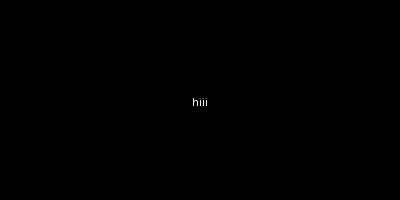

In [ ]:
# Use the user input to generate the logo with the updated styling and effects
generate_simple_logo(text=logo_text, bg_color=bg_color, text_color=text_color, image_path=image_path, font_path=font_path, font_size=font_size, style=style, background_image_path=background_image_path, text_effect=text_effect)

# Display the generated logo
from IPython.display import Image, display

try:
    display(Image(filename='generated_logo.png'))
except FileNotFoundError:
    print("Error: 'generated_logo.png' not found. Please ensure the logo was generated successfully.")

In [ ]:
def generate_industry_prompt(industry):
    """Generates a text prompt for a logo background image based on industry."""
    prompts = {
        "Tech": "a minimalist abstract background image in shades of blue and gray, suitable for a tech company logo.",
        "Education": "a bright and clean background image with subtle learning motifs, suitable for an education logo.",
        "Healthcare": "a modern and clean background image with subtle medical or wellness elements, suitable for a healthcare logo.",
        "Finance": "a sophisticated background image with abstract patterns related to growth or security, suitable for a finance logo.",
        "Food": "a vibrant and inviting background image with subtle food or ingredient elements, suitable for a food logo.",
        # Add more industries and corresponding prompts here
    }
    return prompts.get(industry, f"a professional background image suitable for a {industry} company logo.")

# Example usage:
# tech_prompt = generate_industry_prompt("Tech")
# print(tech_prompt)

# healthcare_prompt = generate_industry_prompt("Healthcare")
# print(healthcare_prompt)

In [ ]:
import openai
from google.colab import userdata

# Retrieve the API key from Colab's secrets manager
openai.api_key = userdata.get('OPENAI_API_KEY')

# Get an industry from the user (you can modify this to get input dynamically)
industry_type = "Tech" # Example industry

# Generate the prompt based on the industry
prompt = generate_industry_prompt(industry_type)
print(f"Generated prompt for '{industry_type}': {prompt}")

try:
    response = openai.images.generate(
        model="dall-e-3",
        prompt=prompt,
        size="1024x1024",
        quality="standard",
        n=1,
    )
    image_url = response.data[0].url
    print(f"Generated image URL: {image_url}")

    # Download the image
    import requests
    image_data = requests.get(image_url).content
    with open("generated_background.png", "wb") as f:
        f.write(image_data)
    print("Generated image saved as 'generated_background.png'")

except Exception as e:
    print(f"Error generating image: {e}")

Generated prompt for 'Tech': a minimalist abstract background image in shades of blue and gray, suitable for a tech company logo.
Error generating image: Error code: 400 - {'error': {'message': 'Billing hard limit has been reached', 'type': 'image_generation_user_error', 'param': None, 'code': 'billing_hard_limit_reached'}}


# Task
Build a unique logo generation feature that allows users to specify shapes (e.g., rectangles) with their color, position, and size to be included in the logo.

## Modify the input function

### Subtask:
Add an option for the user to specify shapes (e.g., rectangles) with their color, position, and size.


**Reasoning**:
Modify the `get_logo_input` function to include prompts for shape input.



In [3]:
import os

def get_logo_input():
    logo_text = input("Enter the text for your logo: ")
    bg_color = input("Enter the background color (e.g., #1E90FF or blue): ")
    text_color = input("Enter the text color (e.g., white or #FFFFFF): ")
    image_path = input("Enter the path to an overlay image file (optional, leave blank to skip): ")
    background_image_path = input("Enter the path to a background image file (optional, leave blank for solid color): ")

    # Basic Font Picker
    print("\nAvailable Fonts (or enter a path to your font file):")
    # List some common system fonts or fonts in the current directory
    available_fonts = ["arial.ttf", "Times New Roman.ttf", "Verdana.ttf", "Courier New.ttf", "Georgia.ttf", "Trebuchet MS.ttf"] # Added more common fonts
    for i, font_name in enumerate(available_fonts):
        print(f"{i+1}. {font_name}")

    font_choice = input(f"Enter the number of your choice or a path to your font file (leave blank for default - arial.ttf): ")

    if font_choice.isdigit() and int(font_choice) > 0 and int(font_choice) <= len(available_fonts):
        font_path = available_fonts[int(font_choice) - 1]
    elif font_choice:
        font_path = font_choice # User provided a path
    else:
        font_path = "arial.ttf" # Default font


    font_size_input = input("Enter the font size (e.g., 60, leave blank for default): ")
    if not font_size_input:
        font_size = 60 # Default size
    else:
        font_size = int(font_size_input) # Convert to integer

    style = input("Enter a style (e.g., simple, bold - basic support, leave blank for simple): ")
    if not style:
        style = "simple" # Default style

    text_effect = input("Enter a text effect (e.g., outline, shadow, leave blank for none): ")

    # Basic Shape Input (for rectangles)
    shapes = []
    add_shape = input("Add a rectangle shape? (yes/no, leave blank for no): ").lower()
    if add_shape == "yes":
        try:
            shape_color = input("Enter rectangle color (e.g., red or #FF0000): ")
            shape_x = int(input("Enter top-left x coordinate for rectangle: "))
            shape_y = int(input("Enter top-left y coordinate for rectangle: "))
            shape_width = int(input("Enter rectangle width: "))
            shape_height = int(input("Enter rectangle height: "))
            shapes.append({"type": "rectangle", "color": shape_color, "position": (shape_x, shape_y), "size": (shape_width, shape_height)})
        except ValueError:
            print("Invalid input for shape parameters. Skipping shape.")


    return logo_text, bg_color, text_color, image_path, font_path, font_size, style, background_image_path, text_effect, shapes

logo_text, bg_color, text_color, image_path, font_path, font_size, style, background_image_path, text_effect, shapes = get_logo_input()
print(f"\nUsing Text: {logo_text}, Background Color: {bg_color}, Text Color: {text_color}")
if image_path:
    print(f"Using Overlay Image: {image_path}")
else:
    print("No overlay image will be used.")
if background_image_path:
    print(f"Using Background Image: {background_image_path}")
else:
    print("Using solid background color.")

print(f"Using Font: {font_path}, Size: {font_size}, Style: {style}")
if text_effect:
    print(f"Using Text Effect: {text_effect}")
else:
    print("No text effect will be used.")
if shapes:
    print(f"Adding Shapes: {shapes}")
else:
    print("No shapes will be added.")

Enter the text for your logo: HB 
Enter the background color (e.g., #1E90FF or blue): black
Enter the text color (e.g., white or #FFFFFF): white
Enter the path to an overlay image file (optional, leave blank to skip): 
Enter the path to a background image file (optional, leave blank for solid color): 

Available Fonts (or enter a path to your font file):
1. arial.ttf
2. Times New Roman.ttf
3. Verdana.ttf
4. Courier New.ttf
5. Georgia.ttf
6. Trebuchet MS.ttf
Enter the number of your choice or a path to your font file (leave blank for default - arial.ttf): 5
Enter the font size (e.g., 60, leave blank for default): 55
Enter a style (e.g., simple, bold - basic support, leave blank for simple): simple
Enter a text effect (e.g., outline, shadow, leave blank for none): outline
Add a rectangle shape? (yes/no, leave blank for no): yes
Enter rectangle color (e.g., red or #FF0000): red
Enter top-left x coordinate for rectangle: 40
Enter top-left y coordinate for rectangle: 40
Enter rectangle widt